LOAN APPROVAL USING MACHINE LEARNNG

Dataset used : Loan Approval dataset

***Dataset coloumns/variables:***

|Coloumns  |Explanation  |
|---------|---------|
|LoanID|A unique ID for each loan|
|Gender|Gender of the applicant - Male/female|
|Married|Marital Status of the applicant|
|Dependents|This coloumn tells whether the applicant has any dependents or not.|
|Education|This coloumn tells us whether the applicant is Graduated or not.|
|Self_Employed|This defines that the applicant is self-employed|
|ApplicantIncome|Income of the Applicant|
|CoapplicantIncome|Income of the Co-Applicant  |
|LoanAmount|Loan amount (in thousands)|
|Loan_Amount_Term|Terms of loan (in months)|
|Credit_History|Credit history of individual’s repayment of their debts|
|Property_Area|Area of property |
|Loan_Status|Status of Loan Approved or not |


### Importing the libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,confusion_matrix


Reading the test and train data from csv files

In [29]:
loan_df=pd.read_csv("D:/Pythom ML course/Fina;l proj/archive (1)/train_data.csv")


In [30]:
loan_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Train dataset

Printing the shape of the dataset

In [31]:
print("The shape of the train dataset is:",loan_df.shape)



The shape of the train dataset is: (614, 13)


Printing out the coloumns present in the train dataset

In [32]:
print("Coloumns in train dataset :",loan_df.columns)




Coloumns in train dataset : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Checking the data type and describing the statistivcal features

In [33]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Counting the total values present in the coloumns

In [35]:
print("Gender count:",loan_df["Gender"].count())
print("Maritial status count:",loan_df["Married"].count())
print("Count of Dependents:",loan_df["Dependents"].count())
print("Education status count:",loan_df["Education"].count())
print("Total Count of Self Employement(Y+N):",loan_df["Self_Employed"].count())
print("Total Count of Property Areas:",loan_df["Property_Area"].count())
print("Total Count of <Loan status:",loan_df["Loan_Status"].count())


Gender count: 601
Maritial status count: 611
Count of Dependents: 599
Education status count: 614
Total Count of Self Employement(Y+N): 582
Total Count of Property Areas: 614
Total Count of <Loan status: 614


Checking the unique values in each coloumn

In [36]:
print("Gender:",loan_df.Gender.unique())
print("Maried status:",loan_df.Married.unique())
print("Self Employed Status:",loan_df.Self_Employed.unique())
print("No of Dependents:",loan_df.Dependents.unique())
print("Education Status:",loan_df.Education.unique())
print("Property Area:",loan_df.Property_Area.unique())
print("Loan Status:",loan_df.Loan_Status.unique())


Gender: ['Male' 'Female' nan]
Maried status: ['No' 'Yes' nan]
Self Employed Status: ['No' 'Yes' nan]
No of Dependents: ['0' '1' '2' '3+' nan]
Education Status: ['Graduate' 'Not Graduate']
Property Area: ['Urban' 'Rural' 'Semiurban']
Loan Status: ['Y' 'N']


Counting the unique values present in the coloumns by grouping it 

In [37]:
loan_df[["Gender"]].groupby(loan_df["Gender"]).count()


,Gender
Gender,
Female,112
Male,489


In [38]:
loan_df[["Married"]].groupby(loan_df["Married"]).count()


,Married
Married,
No,213
Yes,398


In [39]:
loan_df[["Dependents"]].groupby(loan_df["Dependents"]).count()


,Dependents
Dependents,
0,345
1,102
2,101
3+,51


In [40]:

loan_df[["Education"]].groupby(loan_df["Education"]).count()





,Education
Education,
Graduate,480
Not Graduate,134


In [41]:
loan_df[["Self_Employed"]].groupby(loan_df["Self_Employed"]).count()

,Self_Employed
Self_Employed,
No,500
Yes,82


In [42]:
loan_df[["Property_Area"]].groupby(loan_df["Property_Area"]).count()

,Property_Area
Property_Area,
Rural,179
Semiurban,233
Urban,202


In [43]:
loan_df[["Loan_Status"]].groupby(loan_df["Loan_Status"]).count()

,Loan_Status
Loan_Status,
N,192
Y,422


Checking the dataset for null values

In [44]:
loan_df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Converting the missing and null  values in the dataframe

In [46]:
## Categorical variables : Gender,Married,Dependents,Self employed,Credit History
## Numerical variables: Loan amount,loan term
## Here "LoanAmount" is also calculated and filled using mode because of the most common values in the coloumn.

loan_df['Gender'].fillna(loan_df['Gender'].mode()[0],inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0],inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0],inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0],inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0],inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0],inplace=True)
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(),inplace=True)



In [47]:
# Checking the null/missing value count after filling it with mode and mean
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [48]:
loan_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


Converting the categorical variables into numerical values using label encodiinhg

In [49]:
le=LabelEncoder()
coloumns=['Gender','Married','Self_Employed','Dependents','Education','Property_Area','Loan_Status']

for cols in coloumns:
    loan_df[cols]= le.fit_transform(loan_df[cols])



In [50]:
# Checking the dataframe for confirming if label encoder worked properly
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


Defining the feature and label(target) coloumns

In [51]:
# As we dont need the loan id coloumn for our training we are dropping it from the dataframe
loan_df=loan_df.drop(['Loan_ID'],axis=1)

In [52]:
# converting the feature coloumns to a list 
cols=loan_df.columns.tolist()

#coloumn taht we need to identify
label_column= "Loan_Status"

#dropping the label coloumn from the train set 
feature_column=loan_df.columns.drop(label_column).tolist()

#Printing the data
print(f"Coloumns present in the train dataset: {cols}")
print(f"Label Column (Prediction column): {label_column}")
print(f" Feature Columns: {feature_column}")

Coloumns present in the train dataset: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
Label Column (Prediction column): Loan_Status
 Feature Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


### data vz

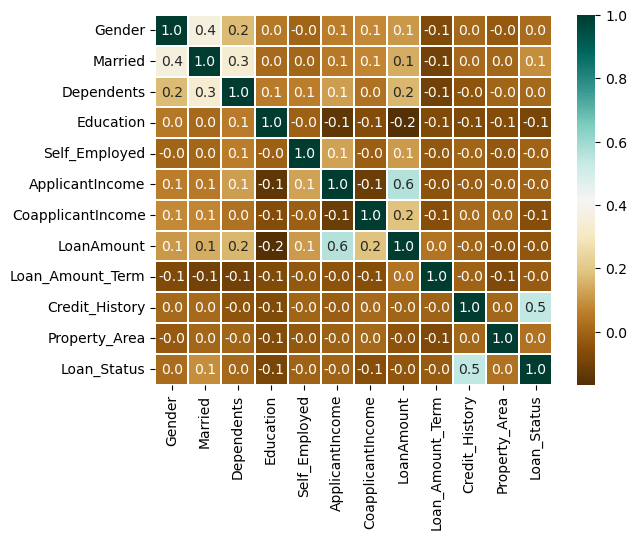

<Figure size 2500x2500 with 0 Axes>

In [53]:
corr = loan_df.corr()

# Visualize the correlation matrix
sb.heatmap(corr, cmap='BrBG',  annot=True, fmt='.1f', linewidths=.1)
plt.figure(figsize=(25,25)) 
plt.show()

the variables with high correlation are : Applicant income - loan amount, credit history - loan status

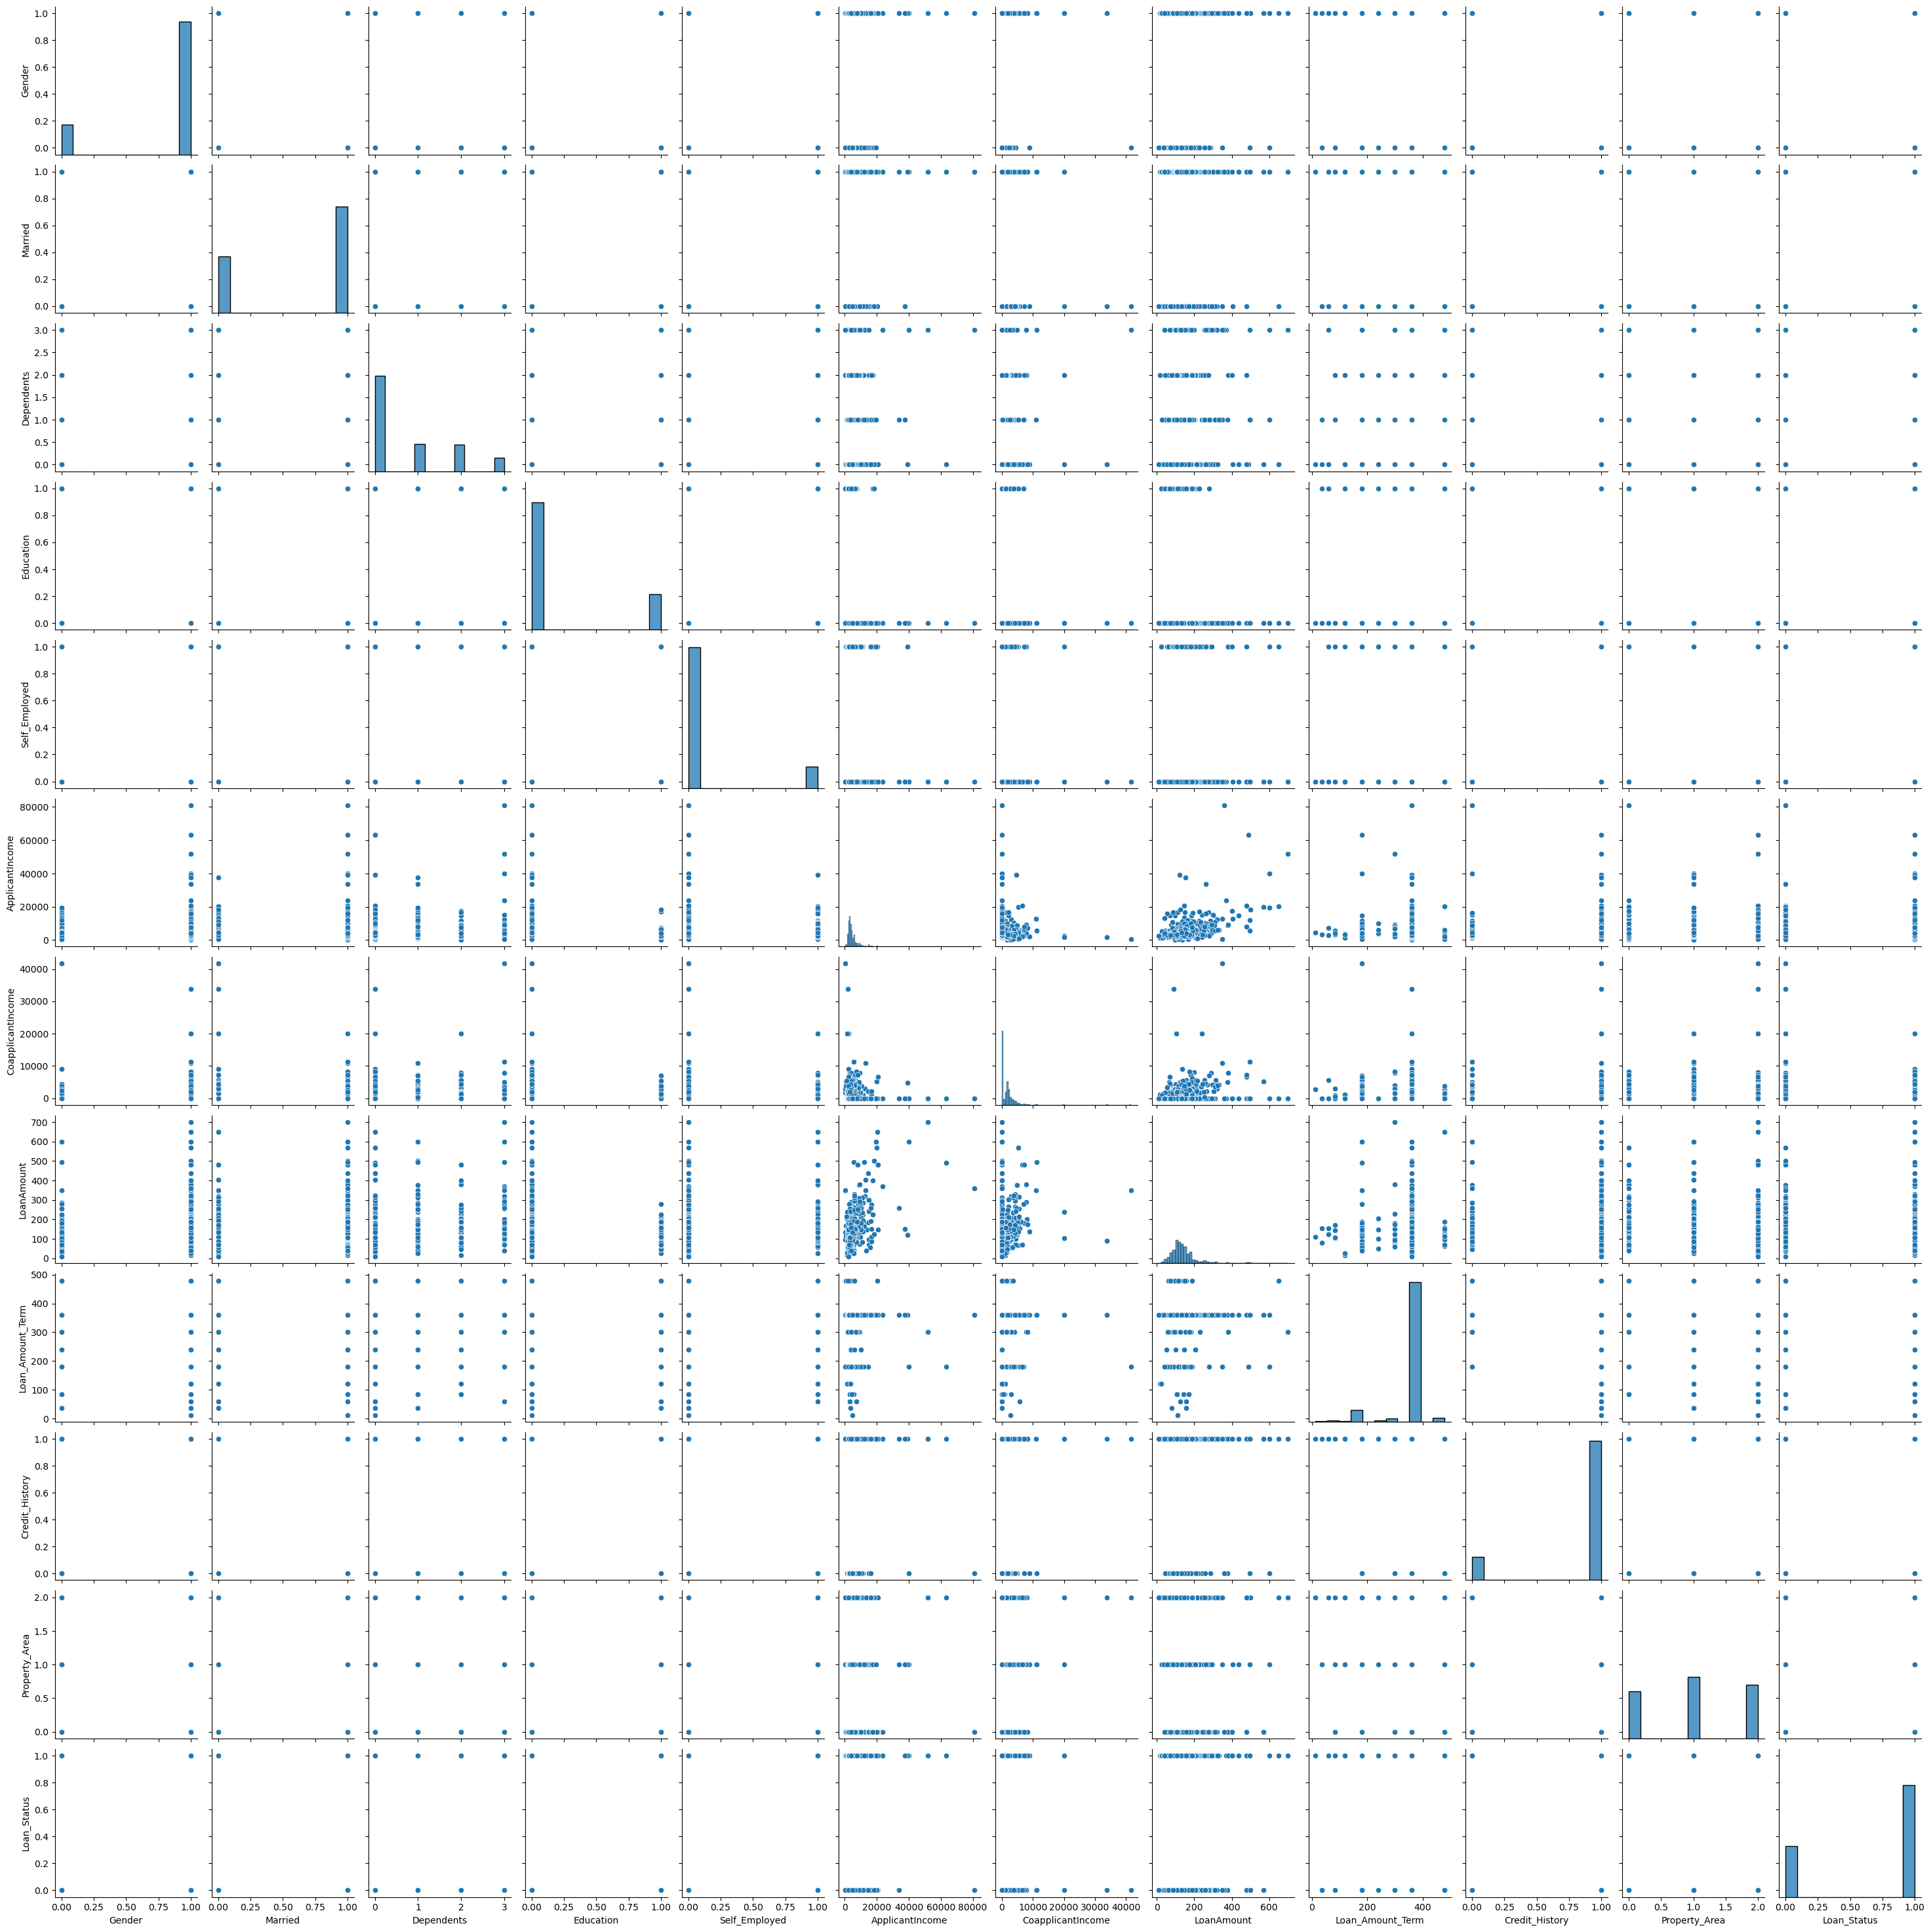

In [54]:
sb.pairplot(data=loan_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

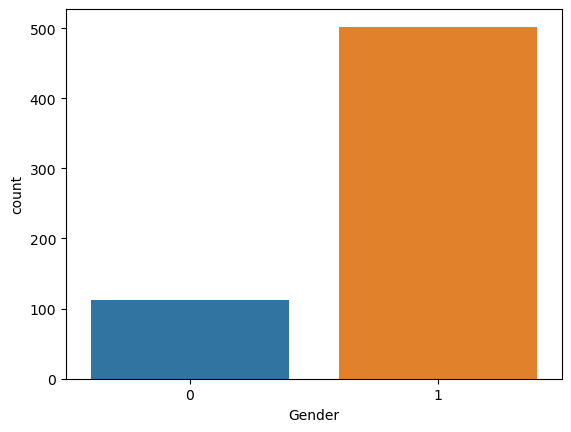

In [56]:
sb.countplot(x='Gender',data=loan_df)

# 0 - Female
# 1 - Male

<AxesSubplot:xlabel='Married', ylabel='count'>

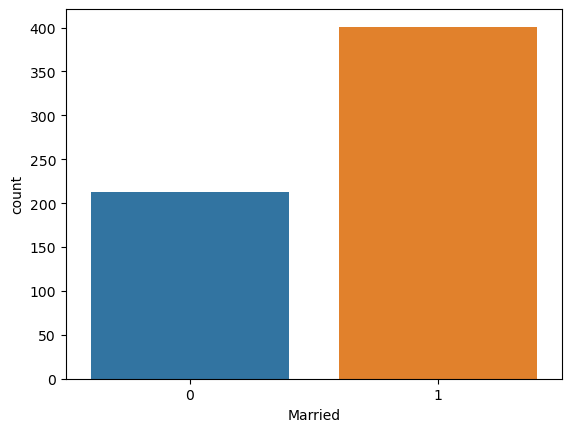

In [57]:
sb.countplot(x='Married',data=loan_df)

# 0 - No
# 1 - Yes

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

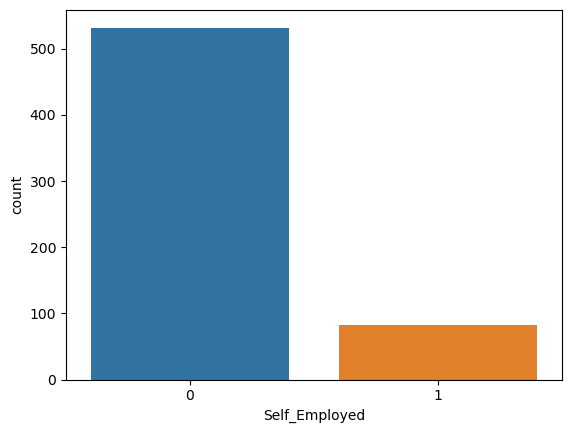

In [58]:
sb.countplot(x='Self_Employed',data=loan_df)

# 0 - No
# 1 - Yes

<AxesSubplot:xlabel='Dependents', ylabel='count'>

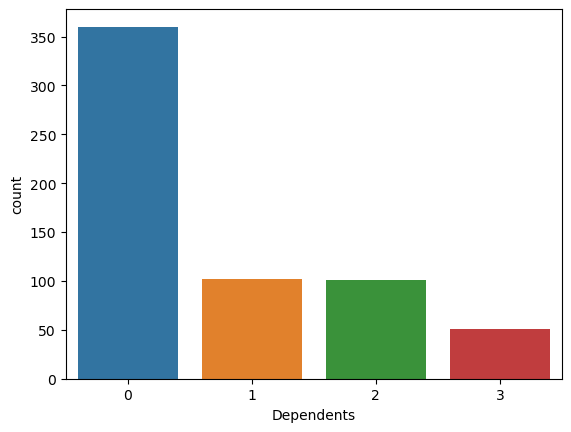

In [59]:
sb.countplot(x='Dependents',data=loan_df)


<AxesSubplot:xlabel='Education', ylabel='count'>

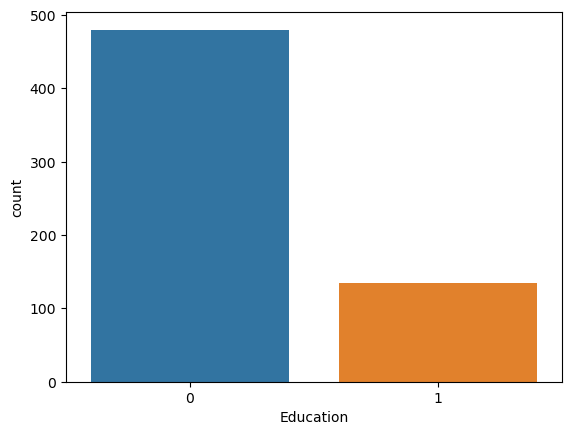

In [60]:
sb.countplot(x='Education',data=loan_df)

# 0 - Graduate
# 1 - Not Graduate

<AxesSubplot:>

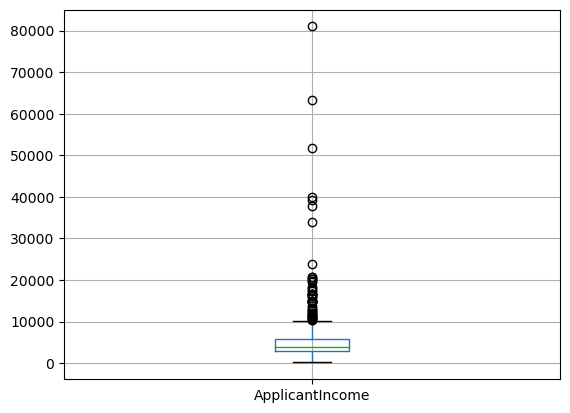

In [61]:
loan_df.boxplot(column='ApplicantIncome')

<AxesSubplot:>

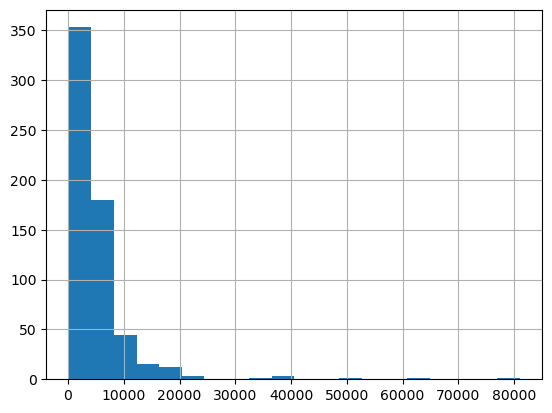

In [62]:
loan_df['ApplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

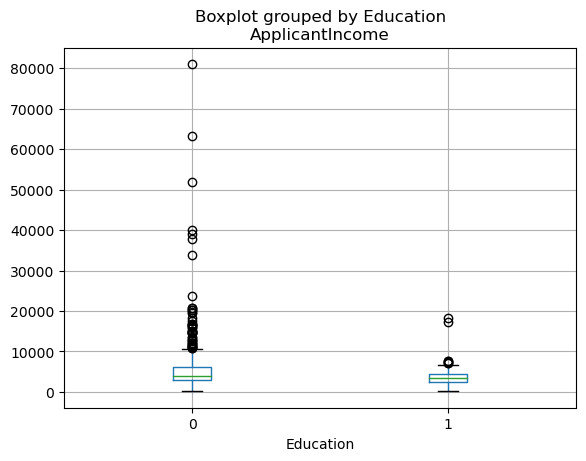

In [63]:
loan_df.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:>

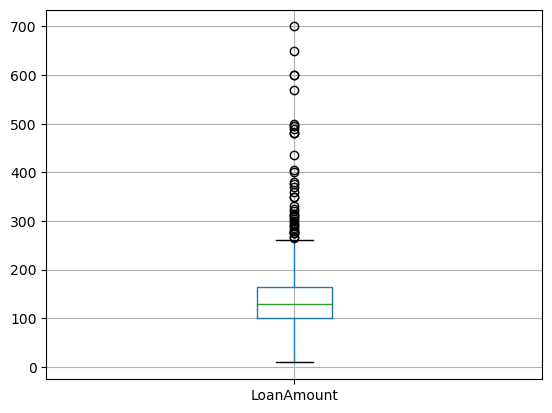

In [64]:
loan_df.boxplot(column='LoanAmount')

<AxesSubplot:>

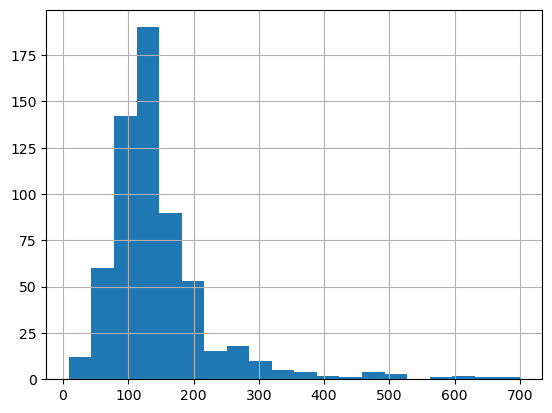

In [65]:
loan_df['LoanAmount'].hist(bins=20)

#### Observation
    - There are many missing values/Null in the dataset. This issue will be overcomed by using mode and mean to fill in the data.
    - The given data set has many categorical values. These values need to be converted into numerical values. For this we will use label encoding
    - We can see that Loan Amount has many outliers, so we will log transform it.

In [66]:
# As Loan Amount has many outliers, we need to normalize them.
loan_df['LoanAmount']=np.log(loan_df['LoanAmount'])

In [67]:
# Checking the dataframe after normalizing
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,4.986426,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,4.852030,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,4.189655,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,4.787492,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,4.262680,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,3.688879,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,5.533389,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,5.231109,360.0,1.0,2,1


## Feature selection

USing Feature Importance.


In [69]:
clf = ExtraTreesClassifier(n_estimators=120)

# fit data
clf.fit(loan_df, loan_df.Loan_Status)

# print feature importances
print(clf.feature_importances_)

[0.00224784 0.00441439 0.0032379  0.00243745 0.00166384 0.00689034
 0.00855539 0.00778714 0.00416457 0.12300706 0.00644399 0.82915008]


## Model training

Splitting the data into train and test

In [70]:
train_df,test_df=train_test_split(loan_df,train_size=0.8,random_state=0,shuffle=False)

Counting the no of records

In [71]:
print(f"Train record count : {len(train_df)}")
print(f"Test record count  : {len(test_df)}")

Train record count : 491
Test record count  : 123


Selecting the required coloumns 

In [72]:
X_train,y_train=train_df[['Gender','Married','Dependents','Self_Employed','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],train_df['Loan_Status']
X_test,y_test=train_df[['Gender','Married','Dependents','Self_Employed','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],train_df['Loan_Status']




Applying standard scaler to normalize the values

In [73]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



Logistic Regression

In [74]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
prediction


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

Accuracy is: 0.8044806517311609
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       153
           1       0.79      0.98      0.87       338

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



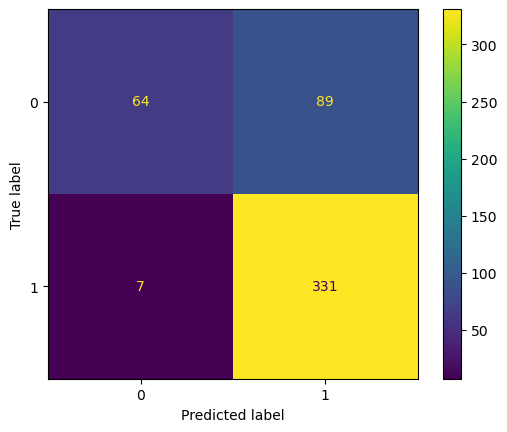

In [75]:
print("Accuracy is:",metrics.accuracy_score(prediction,y_test))
print(metrics.classification_report(y_test, prediction))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction)).plot()

Decision Tree Classifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction_dt=dt.predict(X_test)

Accuracy is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       338

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



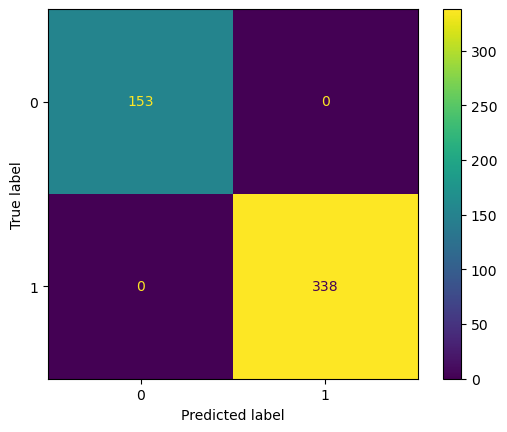

In [78]:
print("Accuracy is:",metrics.accuracy_score(prediction_dt,y_test))
print(metrics.classification_report(y_test, prediction_dt))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_dt)).plot()

Random Forest Classifier

In [79]:
rfc=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rfc.fit(X_train,y_train)
prediction_rfc=rfc.predict(X_test)


Accuracy is: 0.9755600814663951
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       153
           1       0.98      0.98      0.98       338

    accuracy                           0.98       491
   macro avg       0.97      0.97      0.97       491
weighted avg       0.98      0.98      0.98       491



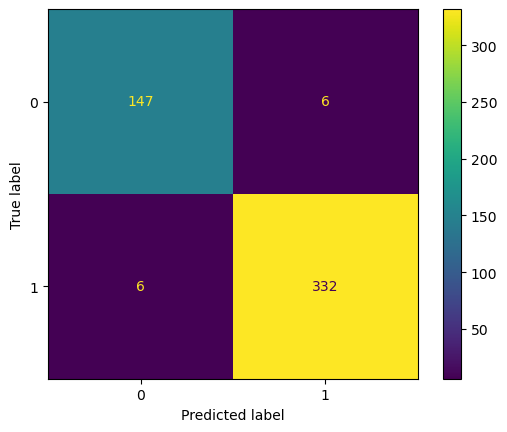

In [80]:
print("Accuracy is:",metrics.accuracy_score(prediction_rfc,y_test))
print(metrics.classification_report(y_test, prediction_rfc))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_rfc)).plot()

Extra Trees Classifier

In [81]:
etc=ExtraTreesClassifier(n_estimators=15, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(X_train,y_train)
prediction_etc=etc.predict(X_test)

Accuracy is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       338

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



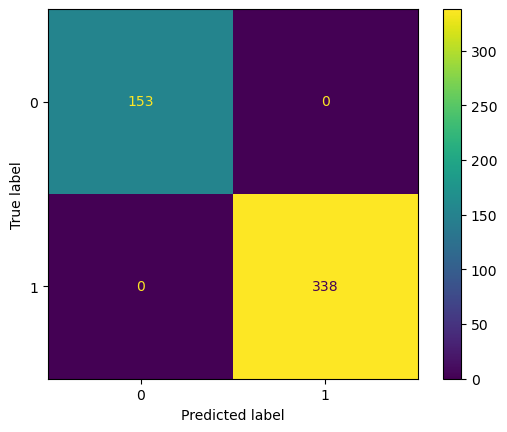

In [82]:
print("Accuracy is:",metrics.accuracy_score(prediction_etc,y_test))
print(metrics.classification_report(y_test, prediction_etc))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_etc)).plot()

SVC

In [83]:
svc=LinearSVC()
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_test)

c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy is: 0.8065173116089613
              precision    recall  f1-score   support

           0       0.91      0.42      0.57       153
           1       0.79      0.98      0.87       338

    accuracy                           0.81       491
   macro avg       0.85      0.70      0.72       491
weighted avg       0.83      0.81      0.78       491



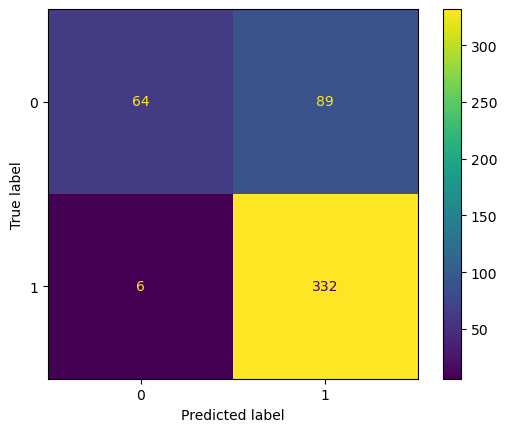

In [84]:
print("Accuracy is:",metrics.accuracy_score(prediction_svc,y_test))
print(metrics.classification_report(y_test, prediction_svc))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_svc)).plot()

Gradient Boosting Classifier

In [85]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
prediction_gbc=gbc.predict(X_test)

Accuracy is: 0.890020366598778
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       153
           1       0.86      1.00      0.93       338

    accuracy                           0.89       491
   macro avg       0.93      0.83      0.86       491
weighted avg       0.90      0.89      0.88       491



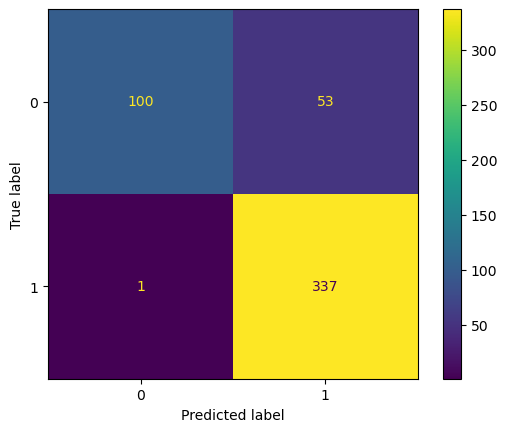

In [86]:
print("Accuracy is:",metrics.accuracy_score(prediction_gbc,y_test))
print(metrics.classification_report(y_test, prediction_gbc))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_gbc)).plot()

KNN Classifier

In [87]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_test)


c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy is: 0.8207739307535642
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       153
           1       0.82      0.95      0.88       338

    accuracy                           0.82       491
   macro avg       0.82      0.74      0.77       491
weighted avg       0.82      0.82      0.81       491



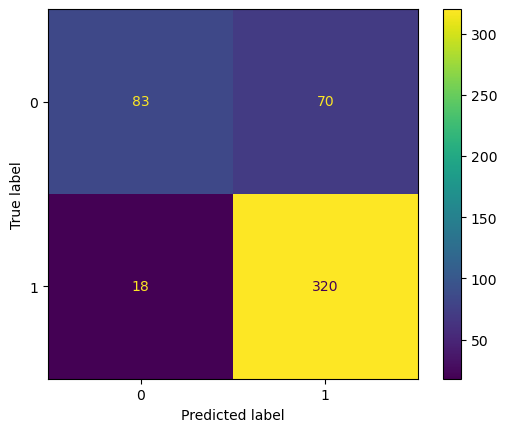

In [88]:
print("Accuracy is:",metrics.accuracy_score(prediction_knn,y_test))
print(metrics.classification_report(y_test, prediction_knn))
metrics.ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=prediction_knn)).plot()

***Model Results Comparision (without kfold)***

|Model  |Accuracy  |
|---------|---------|
|Logistic Regression|0.8044|
|Decision Tree|1.0|
|Random Forest Classifier|0.975|
|K Neighbours Clasifier|0.82|
|Extra Tree Classifier|1.0|
|Gradient Boosting|0.89|
|Linear SVC|0.806|



K Fold Cross Validation

Cross Val Score is used here for Cross validation. By default, it uses K fold cross validation or stratified cross validation. 
I hav set the K Folds as 5 , where the train data will be split into 5 sets and 1 set will be used for testing

In [91]:

other_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(criterion='gini',max_depth=100),
    "Random Forest": RandomForestClassifier(n_estimators=200,max_depth=150),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=250),
    "Support Vector Machine": LinearSVC(),
    "Extra Tree Classifier":ExtraTreesClassifier(max_depth=250)
    
}
k_folds=KFold(n_splits=5)
for name, model in other_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_folds,scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores)}")

Logistic Regression Accuracy: 0.8045145330859617
K-Nearest Neighbors Accuracy: 0.7841063698206555
Decision Tree Accuracy: 0.7088023088023088


c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Random Forest Accuracy: 0.7881673881673882
Gradient Boosting Accuracy: 0.7658214801071944


c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Ideapad 3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine Accuracy: 0.8045145330859617
Extra Tree Classifier Accuracy: 0.8004122861265719


***Model Results Comparision (with kfold)***

|Model  |Accuracy  |
|---------|---------|
|Logistic Regression|0.8044|
|Decision Tree|0.71|
|Random Forest Classifier|0.79|
|K Neighbours Clasifier|0.78|
|Extra Tree Classifier|0.80|
|Gradient Boosting|0.77|
|Linear SVC|0.804|

### Overall Observation

- Without KFold, the models **Decision tree** and **Extra trees clasifier** have shown an accuracy of 1, which means that all the labels are rightly predicted.
- The other well performed model on this dataset without KFold is **Random Forest Clasifier** with an accuracy of 97.5%

- With KFold, **Linear SVC** , **Logistic regression** and **Extra trees Classifier** have performed well with 80% accuracy

In conclusion, for this dataset, **Extra Trees Classifier** have shown to be a better model than the rest of them with and without KFold.